In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [2]:
df = pd.read_csv("/content/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

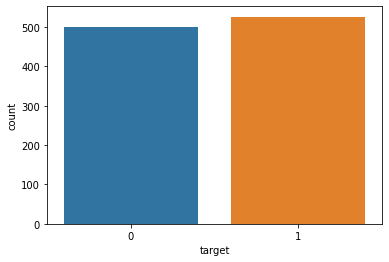

In [5]:
# EDA
import seaborn as sns
sns.countplot(x = "target", data = df)

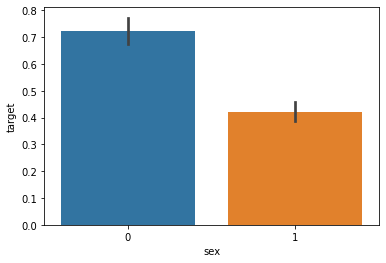

In [6]:
sns.barplot(x = "sex",y="target",data= df)

In [7]:
df.value_counts("target")

target
1    526
0    499
dtype: int64

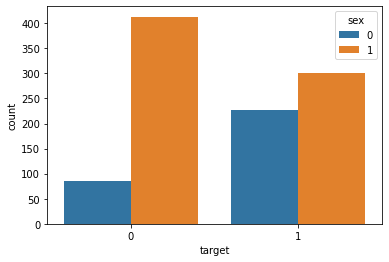

In [8]:
sns.countplot(x = df.target, hue = df.sex)

In [9]:
x = df.age
y = df.target

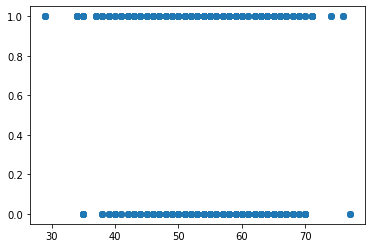

In [10]:
plt.scatter(x,y)

In [11]:
model = linear_model.LogisticRegression()

In [12]:
x = df.drop(['target'],axis = "columns")

In [13]:
y = df["target"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [16]:
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [18]:
x_test.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
70,59,1,0,170,326,0,0,140,1,3.4,0,0,3
860,52,1,0,112,230,0,1,160,0,0.0,2,1,2
100,43,0,2,122,213,0,1,165,0,0.2,1,0,2
974,43,1,0,110,211,0,1,161,0,0.0,2,0,3
483,35,1,1,122,192,0,1,174,0,0.0,2,0,2


In [19]:
model.predict([[68,1,2,118,277,0,1,151,0,1.0,2,1,3]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [20]:
import pickle

In [21]:
with open ("model pickel","wb") as f:
  pickle.dump(model,f)

In [22]:
with open("model pickel","rb") as f:
  m = pickle.load(f)

In [23]:
m.predict([[68,1,2,118,277,0,1,151,0,1.0,2,1,3]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])